<a href="https://colab.research.google.com/github/prammmoe/data-transformation/blob/main/data_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 5 Praktik Data Mining

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [2]:
!chmod 600 /root/.kaggle/kaggle.json

In [36]:
!kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

  0% 0.00/58.4k [00:00<?, ?B/s]
100% 58.4k/58.4k [00:00<00:00, 60.8MB/s]


In [37]:
! unzip heart-disease-prediction-using-logistic-regression

Archive:  heart-disease-prediction-using-logistic-regression.zip
  inflating: framingham.csv          


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dataset

Di sini digunakan dataset framingham yang mana mempunyai banyak nilai NaN, agar proses imputasi dapat berjalan dengan baik dan jelas.

In [162]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [163]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


Terlihat pada dataframe di atas, nilai BPMeds pada baris 4235 berniali NaN, nilai ini nantinya akan kita imputasi menggunakan beberapa metode imputasi.

# NaN Value

Bisa kita lihat pada data di bawah bahwa NaN value dari df sangat banyak, sehingga perlu dilakukan imputasi data

In [164]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Imputasi Mean

In [165]:
new_df = df.fillna(df.mean())

In [166]:
new_df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0
4237,0,52,2.0,0,0.0,0.00000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0


In [169]:
new_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


Dengan menggunakan imputasi Mean, nilai BPMeds pada baris 4235 yang tadinya bernilai NaN sekarang menjadi 0.02963.

# Imputasi Arbitrary

Imputasi ini men-assign nilai suka-suka kepada nilai yang bernilai NaN.

In [58]:
df.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Misal untuk kolom `Education` di atas, kita beri nilai 2.0 yang merupakan nilai di tgengah-tengah 1.0 dan 4.0

In [128]:
df['education'] = df['education'].fillna(2.0)

In [129]:
df['education'].head(50)

0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
5       2.0
6       1.0
7       2.0
8       1.0
9       1.0
10      1.0
11      2.0
12      1.0
13      3.0
14      2.0
15      2.0
16      3.0
17      2.0
18      2.0
19      2.0
20      2.0
21      1.0
22      1.0
23      3.0
24      2.0
25      4.0
26      1.0
27      2.0
28      3.0
29      1.0
30      4.0
31      4.0
32      1.0
33    400.0
34      1.0
35      2.0
36    400.0
37      1.0
38      1.0
39      3.0
40      2.0
41      2.0
42      1.0
43      2.0
44      3.0
45      2.0
46      1.0
47      1.0
48      2.0
49      3.0
Name: education, dtype: float64

Setelah di-fill, maka nilai NaN akan menjadi nilai 2.0

# Imputasi End of Tail

In [61]:
df['education'].head(40)

0     4.0
1     2.0
2     1.0
3     3.0
4     3.0
5     2.0
6     1.0
7     2.0
8     1.0
9     1.0
10    1.0
11    2.0
12    1.0
13    3.0
14    2.0
15    2.0
16    3.0
17    2.0
18    2.0
19    2.0
20    2.0
21    1.0
22    1.0
23    3.0
24    2.0
25    4.0
26    1.0
27    2.0
28    3.0
29    1.0
30    4.0
31    4.0
32    1.0
33    NaN
34    1.0
35    2.0
36    NaN
37    1.0
38    1.0
39    3.0
Name: education, dtype: float64

Bisa kita lihat pada baris ke 33 dari kolom education di atas bernilai NaN.

In [63]:
!pip install feature-engine
from feature_engine.imputation import EndTailImputer

In [67]:
imputer = EndTailImputer(imputation_method="gaussian", tail="right")

imputer.fit(df)
test_t = imputer.transform(df)

test_t.head(40)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.000000,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.000000,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.000000,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.000000,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
5,0,43,2.000000,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.000000,0
6,0,63,1.000000,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.000000,1
7,0,45,2.000000,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.000000,0
8,1,52,1.000000,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.000000,0
9,1,43,1.000000,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.000000,0


Setelah dilakukan imputasi, maka baris 33 pada kolom education di atas akan bernilai 5.038322


# Imputasi Frequent Category/Modus

Imputasi frequent category/Modus merupakan teknik untuk menggantikan nilai/data hilang dan digunakan bagi tipe data kategori. Cocok untuk data dengan missing at random.

In [68]:
from sklearn.impute import SimpleImputer

In [75]:
df = pd.read_csv('application_record.csv')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [77]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [79]:
df['OCCUPATION_TYPE'].head(20)

0                NaN
1                NaN
2     Security staff
3        Sales staff
4        Sales staff
5        Sales staff
6        Sales staff
7                NaN
8                NaN
9                NaN
10       Accountants
11       Accountants
12       Accountants
13          Laborers
14          Laborers
15          Laborers
16          Laborers
17          Laborers
18          Laborers
19       Accountants
Name: OCCUPATION_TYPE, dtype: object

Pada data di atas, bisa kita lihat bahwa kolom occupation type memiliki banyak sekali missing value, maka akan kita imputasi menggunakan imputasi modus.

In [85]:
imp = SimpleImputer(strategy='most_frequent')

new_df = imp.fit_transform(df)

In [87]:
new_df

array([[5008804, 'M', 'Y', ..., 0, 'Laborers', 2.0],
       [5008805, 'M', 'Y', ..., 0, 'Laborers', 2.0],
       [5008806, 'M', 'Y', ..., 0, 'Security staff', 2.0],
       ...,
       [6841878, 'F', 'N', ..., 0, 'Sales staff', 1.0],
       [6842765, 'F', 'N', ..., 0, 'Laborers', 2.0],
       [6842885, 'F', 'N', ..., 0, 'Sales staff', 2.0]], dtype=object)

Pada data di atas di baris pertama dan kedua, data occupation yang tadinya NaN telah terganti menjadi Laborers, hal ini menunjukan bahwa pada kolom tersebut data didominasi oleh data laborers sehingga itu merupakan modus data pada kolom tersebut.

# Imputasi Random Sample

Imputasi Random Sample merupakan teknik untuk menggantikan nilai/data hilang dan digunakan bagi tipe data kategori. Cocok untuk data missing at random. Imputasi ini menggantikan missing value dengan nilai lain dalam distribusi yang sama dari variabel asli.

In [90]:
from feature_engine.imputation import RandomSampleImputer

df['OCCUPATION_TYPE']

0                    NaN
1                    NaN
2         Security staff
3            Sales staff
4            Sales staff
               ...      
438552               NaN
438553          Laborers
438554       Sales staff
438555               NaN
438556       Sales staff
Name: OCCUPATION_TYPE, Length: 438557, dtype: object

Pada data occupation terlihat baris pertama dan kedua bernilai NaN

In [92]:
imputer = RandomSampleImputer(random_state=30)

imputer.fit(df)

test_t = imputer.transform(df)

In [93]:
test_t

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,High skill tech staff,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Medicine staff,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,Private service staff,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,Sales staff,2.0


Setelah dilakukan imputasi, baris pertama dan kedua pada kolom occupation type akan menjadi `High skill tech staff` dan `Medicine staff` masing-masing.

# Imputasi Nilai Nol/Konstanta

In [94]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [109]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [119]:
df['totChol'].head(50)

0     195.0
1     250.0
2     245.0
3     225.0
4     285.0
5     228.0
6     205.0
7     313.0
8     260.0
9     225.0
10    254.0
11    247.0
12    294.0
13    332.0
14    226.0
15    221.0
16    232.0
17    291.0
18    195.0
19    195.0
20    190.0
21    185.0
22    234.0
23    215.0
24    270.0
25    294.0
26    260.0
27    225.0
28    272.0
29    247.0
30    295.0
31    226.0
32    209.0
33    175.0
34    214.0
35    225.0
36    257.0
37    178.0
38    233.0
39    180.0
40    243.0
41    237.0
42      NaN
43    195.0
44    311.0
45    208.0
46    252.0
47    261.0
48    179.0
49    194.0
Name: totChol, dtype: float64

In [130]:
df['totChol'] = df['totChol'].fillna(0)

In [131]:
df['totChol'].head(50)

0     195.0
1     250.0
2     245.0
3     225.0
4     285.0
5     228.0
6     205.0
7     313.0
8     260.0
9     225.0
10    254.0
11    247.0
12    294.0
13    332.0
14    226.0
15    221.0
16    232.0
17    291.0
18    195.0
19    195.0
20    190.0
21    185.0
22    234.0
23    215.0
24    270.0
25    294.0
26    260.0
27    225.0
28    272.0
29    247.0
30    295.0
31    226.0
32    209.0
33    175.0
34    214.0
35    225.0
36    257.0
37    178.0
38    233.0
39    180.0
40    243.0
41    237.0
42      0.0
43    195.0
44    311.0
45    208.0
46    252.0
47    261.0
48    179.0
49    194.0
Name: totChol, dtype: float64

Bisa kita lihat pada kolom totChol, nilai baris 42 yang sebelumnya bernilai NaN telah diganti menjadi 0.0

# Imputasi Regresi: Deterministik

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model

%matplotlib inline

In [135]:
df = pd.read_csv('diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [136]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [138]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

#Menghitung nilai null dari dataframe, dan hanya 5 (lima) kolom dengan menambahkan [1:6]

df.isnull().sum()[1:6]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

<Axes: >

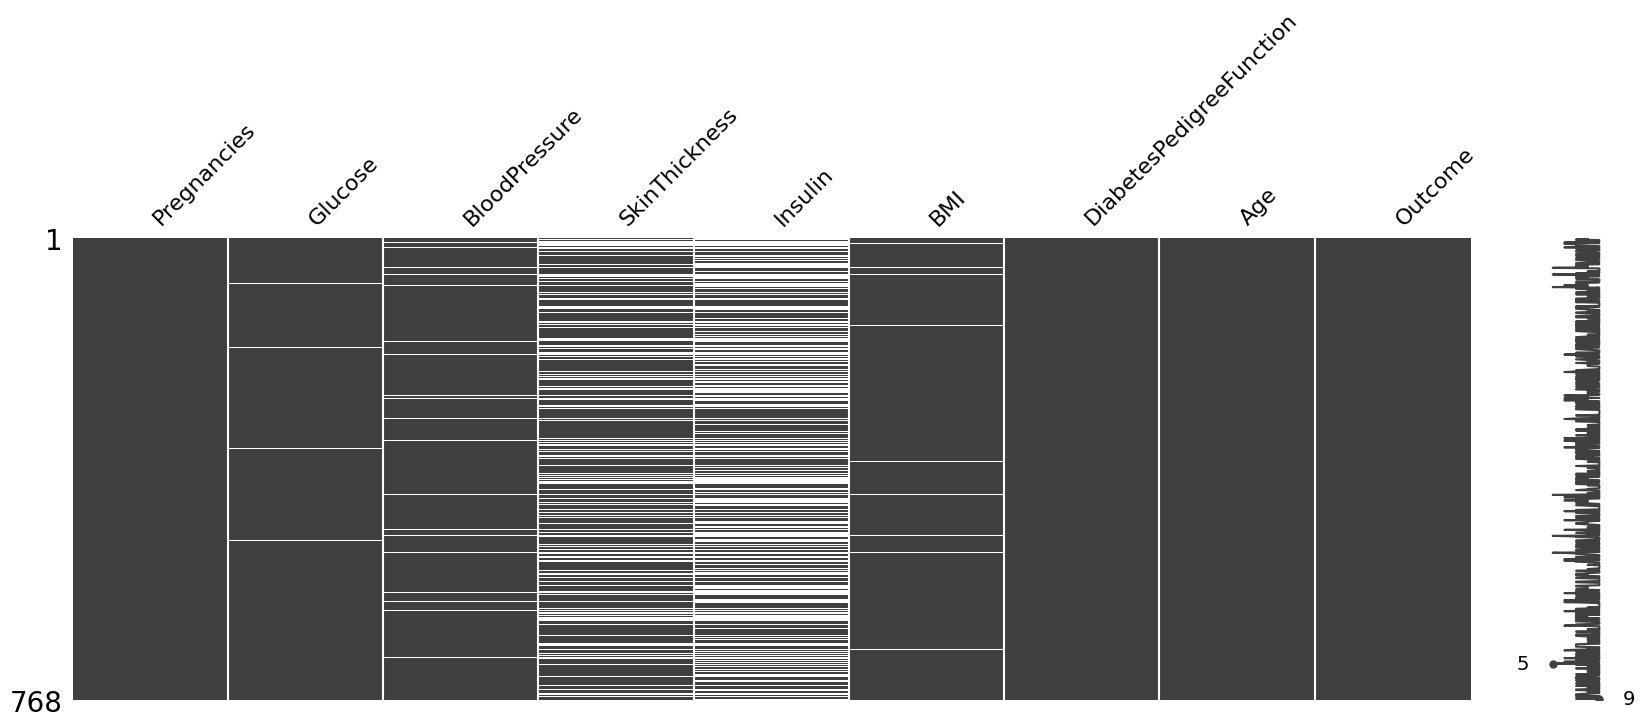

In [139]:
mno.matrix(df, figsize = (20, 6))

In [140]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [141]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)

    return df

In [142]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [143]:
# Deterministic Regression Imputation

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:

    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

    # Buat model Regresi Linier untuk memperkirakan data yang hilang

    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])

    # amati bahwa kita menyimpan indeks data yang hilang dari kerangka data asli

    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

<Axes: >

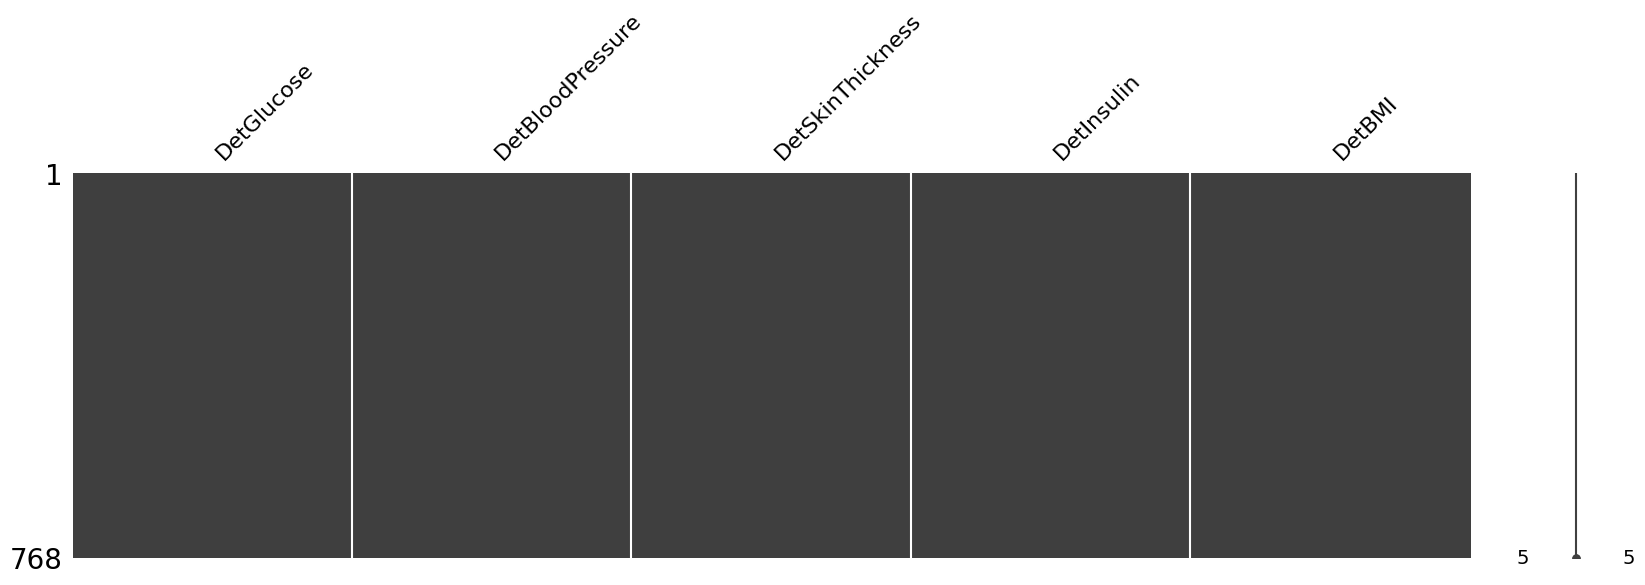

In [144]:
# membuat matriks

mno.matrix(deter_data, figsize = (20,5))

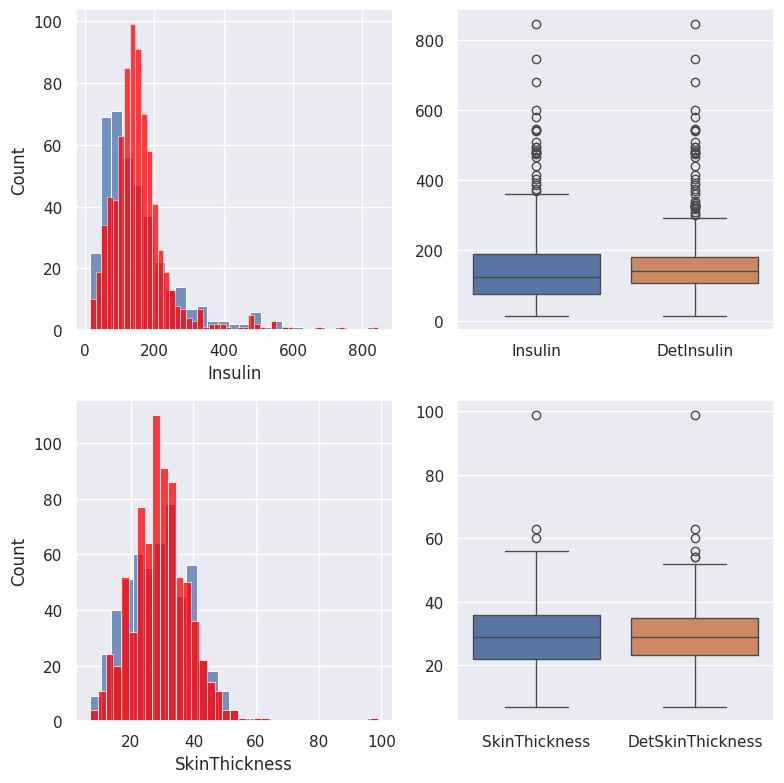

In [145]:
# membuat chart

sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.histplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.histplot(deter_data["Det" + variable], kde = False, ax = axes[index, 0], color = 'red')

    sns.boxplot(data = pd.concat([df[variable], deter_data["Det" + variable]], axis = 1),
                ax = axes[index, 1])

plt.tight_layout()

In [146]:
#Tampilkan nilai perhitungan statistika untuk kolom tertentu

pd.concat([df[["Insulin", "SkinThickness"]], deter_data[["DetInsulin", "DetSkinThickness"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Insulin,394.0,155.548223,118.775855,14.0,76.250000,125.000000,190.000000,846.0
SkinThickness,541.0,29.153420,10.476982,7.0,22.000000,29.000000,36.000000,99.0
DetInsulin,768.0,155.285372,88.761303,14.0,106.320736,142.195131,182.000000,846.0
DetSkinThickness,768.0,29.233021,9.141473,7.0,23.269900,29.000000,34.839229,99.0


# Imputasi Regresi: Stokastik

In [147]:
#Import library

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model

%matplotlib inline

In [148]:
#Menentukan nilai yang hilang

df = pd.read_csv("diabetes2.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [150]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [151]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

#Menghitung nilai null dari dataframe, dan hanya 5 (lima) kolom dengan menambahkan [1:6]

df.isnull().sum()[1:6]


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

<Axes: >

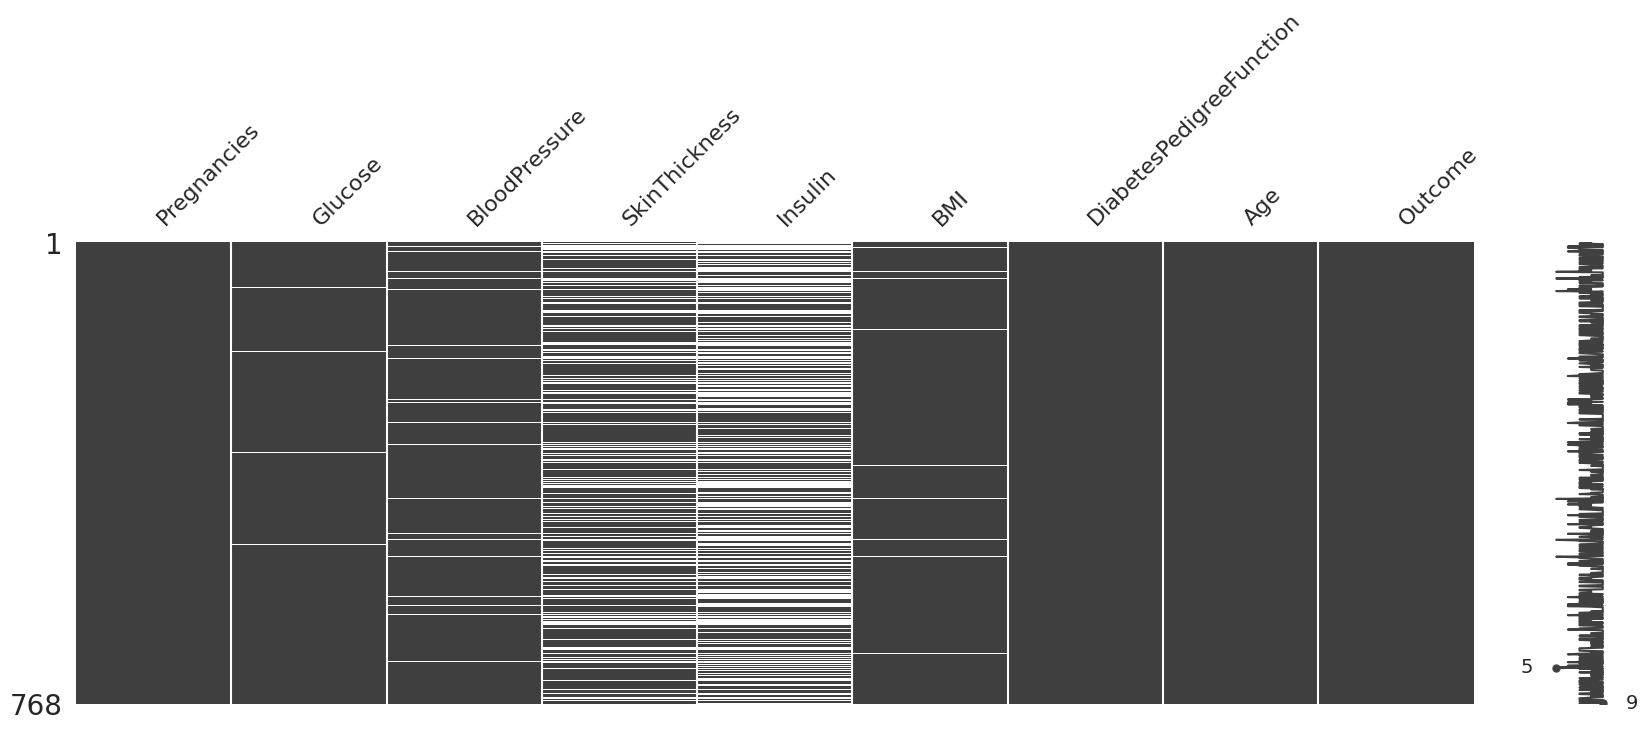

In [152]:
# membuat matriks

mno.matrix(df, figsize = (20, 6))

In [153]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [154]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)

    return df

In [155]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [156]:
#Stochastic Regression Imputation

random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:

    random_data["Ran" + feature] = df[feature + '_imp']
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])

    #Kesalahan Standar dari perkiraan regresi sama dengan std() dari kesalahan setiap perkiraan

    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()

    #Amati bahwa kita menyimpan indeks data yang hilang dari kerangka data asli
    random_predict = np.random.normal(size = df[feature].shape[0],
                                      loc = predict,
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) &
                                                                            (random_predict > 0)]

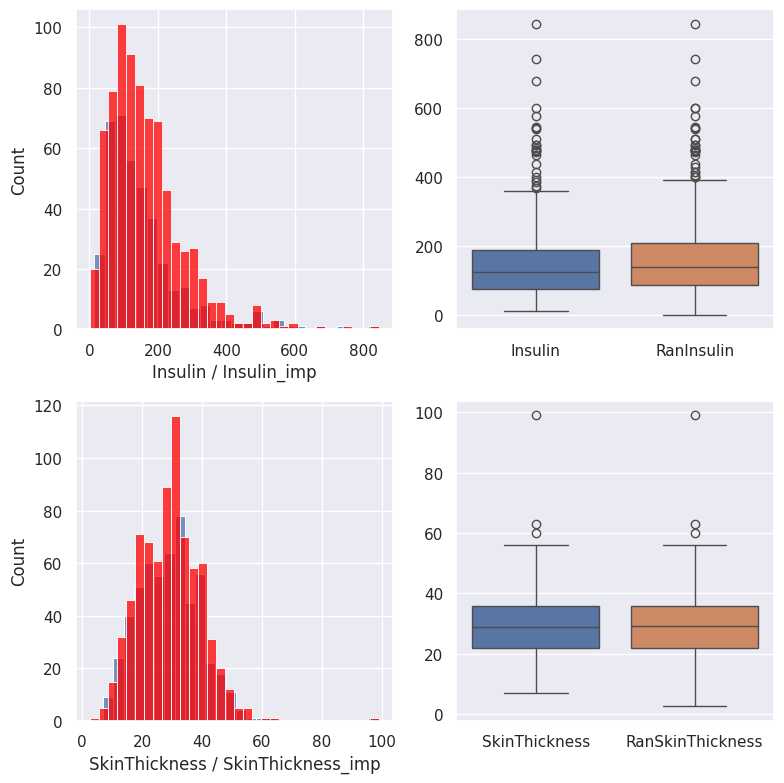

In [157]:
#Membuat chart

sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.histplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.histplot(random_data["Ran" + variable], kde = False, ax = axes[index, 0], color = 'red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')

    sns.boxplot(data = pd.concat([df[variable], random_data["Ran" + variable]], axis = 1),
                ax = axes[index, 1])

    plt.tight_layout()

In [158]:
#Tampilkan nilai perhitungan statistika untuk kolom tertentu

pd.concat([df[["Insulin", "SkinThickness"]], random_data[["RanInsulin", "RanSkinThickness"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Insulin,394.0,155.548223,118.775855,14.000000,76.25,125.000000,190.000000,846.0
SkinThickness,541.0,29.153420,10.476982,7.000000,22.00,29.000000,36.000000,99.0
RanInsulin,768.0,165.026697,109.405637,1.714329,88.00,140.474158,210.518432,846.0
RanSkinThickness,768.0,29.127113,10.102939,2.610681,22.00,29.178173,36.000000,99.0


In [159]:
#Import library scipy

import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats.mstats import trima

# Masukkan array berisi 1 - 10

a = np.array([10, 4, 9, 8, 5, 3, 7, 2, 1, 6])

In [160]:
#Winsorize akan mengganti 10% nilai terendah dan 20% nilai tinggi

wins = winsorize(a, limits=[0.1, 0.2])
wins

masked_array(data=[8, 4, 8, 8, 5, 3, 7, 2, 2, 6],
             mask=False,
       fill_value=999999)

In [161]:
trims = trima(a, limits=(2,8))
print(trims)

[-- 4 -- 8 5 3 7 2 -- 6]
